In [2]:
# Importing the libraries 
import pandas as pd # Used to manipulate the dataframe
import numpy as np # Used for scientific calculations
import matplotlib.pyplot as plt # Used for data visualisation
import seaborn as sns # Used for data visualisation
import missingno as msno # Used for visualizing missing values 
import warnings # Used to remove warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import math # Used for mathematical operations
from IPython.display import Image # Used for displaying image
import warnings # Used to remove warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [3]:
# Importing the data
df = pd.read_csv(r'C:\Users\Vidip Jain\OneDrive\Desktop\Data Science\House_Price_Project\train.csv')

In [4]:
# Displaying the data
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# Creating a heatmap in the dataframe using viridis colour
df.head(10).style.background_gradient(cmap = "viridis")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,B

In [6]:
# Getting the first five rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Getting the last five rows of the dataframe
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
# Getting the basic information about the dataframe
df.describe().transpose().style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [9]:
# Getting basic information from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

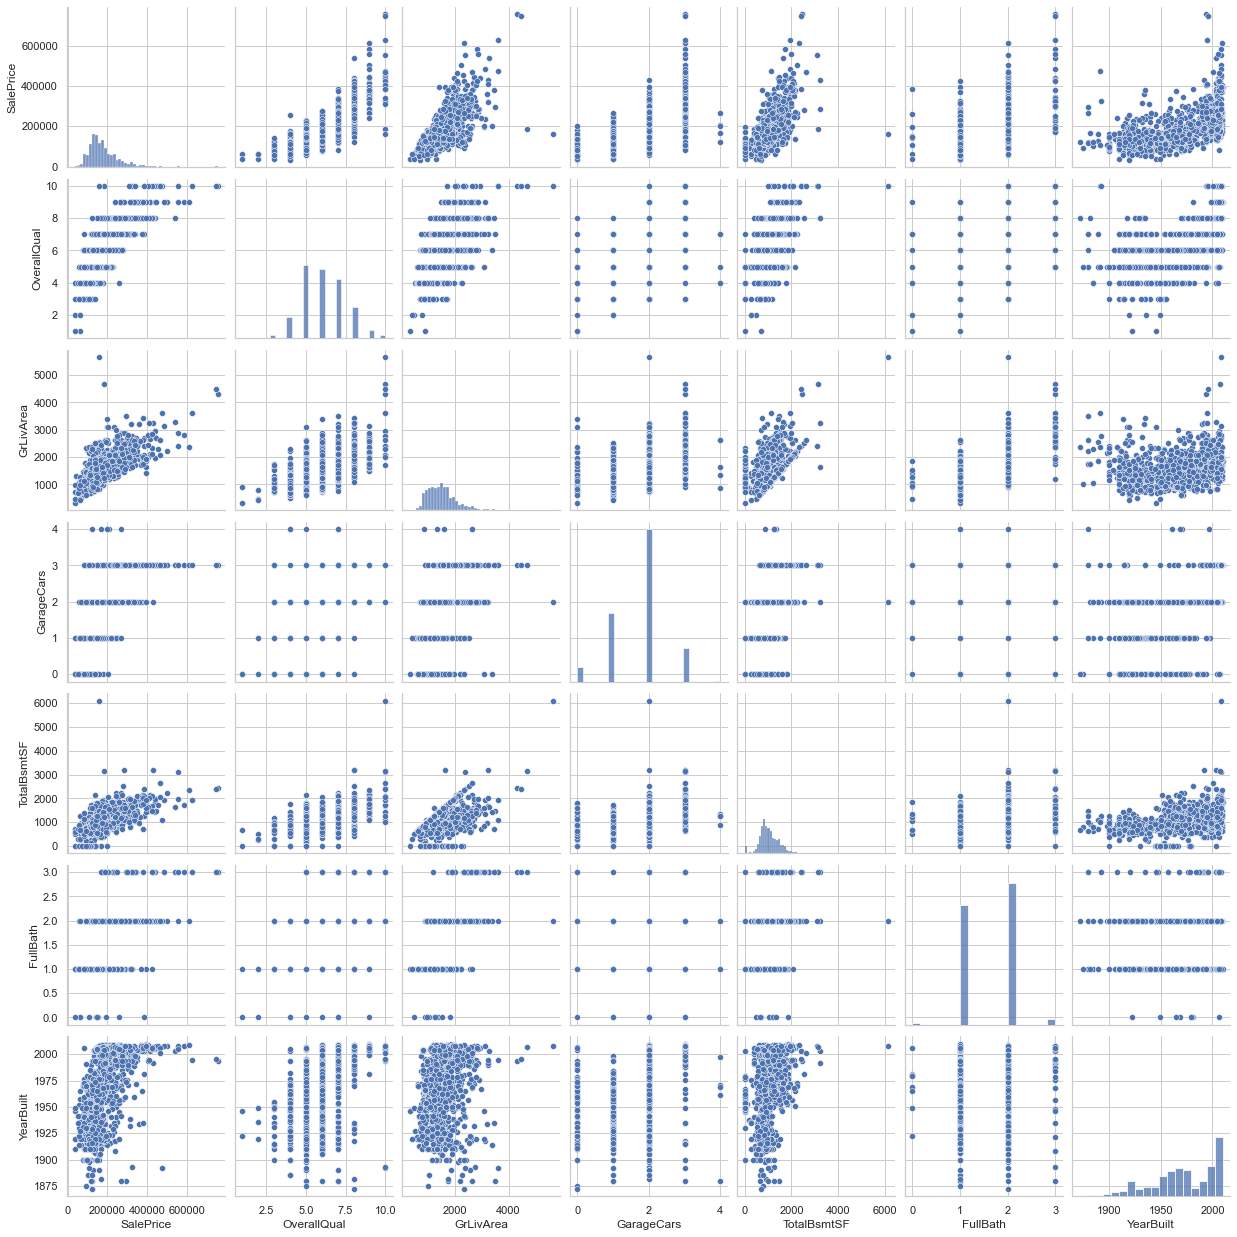

In [10]:
# Plotting pairplots for certain columns
var_num = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(df[var_num]);

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

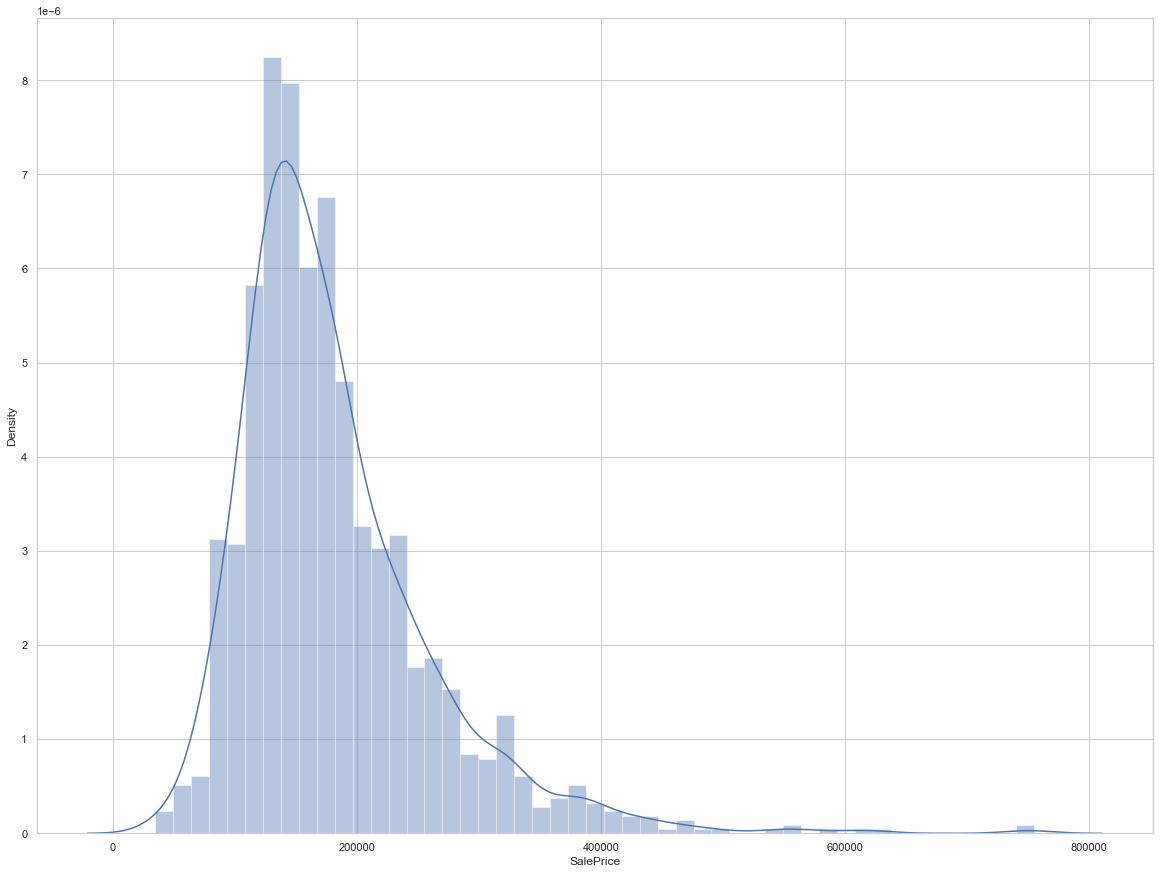

In [11]:
# Plotting a distribution graph to get an idea of the range of the SalePrice
sns.distplot(df["SalePrice"])

In [12]:
# Getting the basic information about the SalePrice
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
# We notice that there is a large gap between the min and the max

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

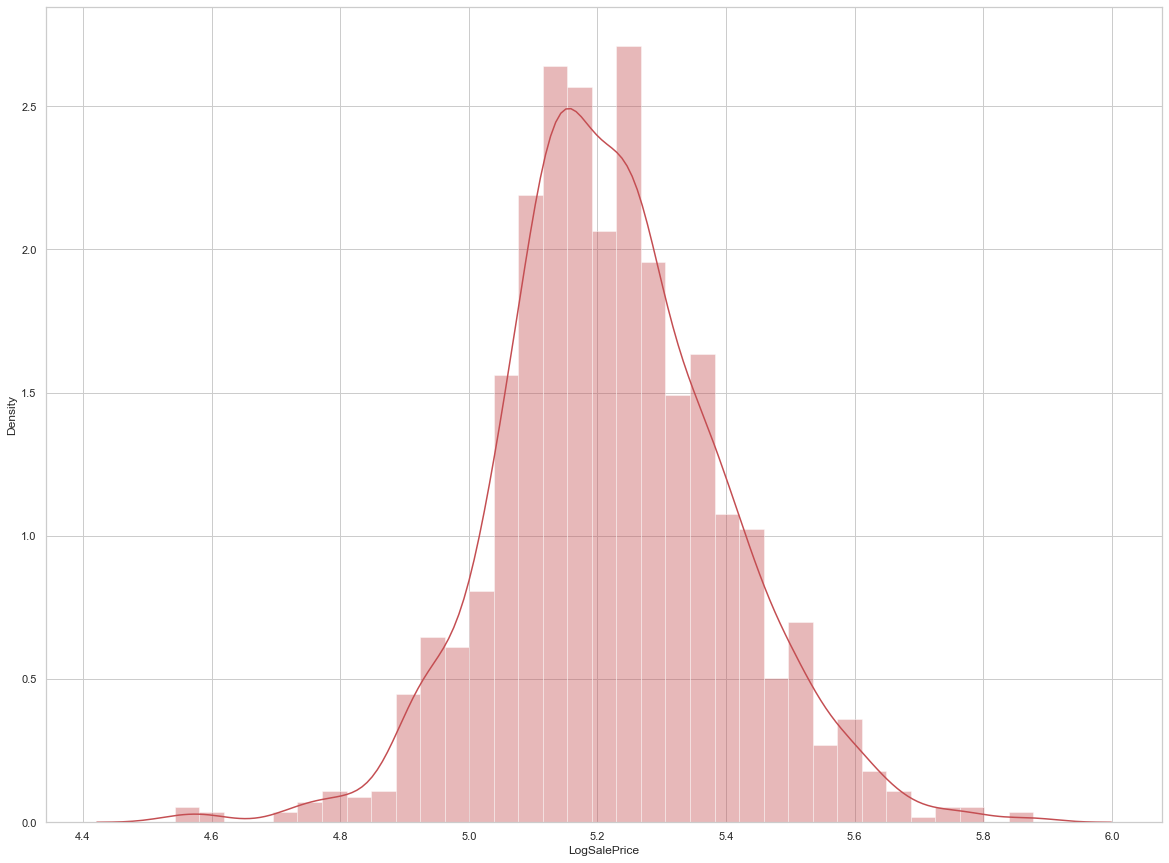

In [14]:
# Creating a new column of LogSalePrice as a way to bridge the gap between the min and the max value of SalePrice
df["LogSalePrice"] = np.log10(df["SalePrice"])
sns.distplot(df["LogSalePrice"],color = 'r')

In [15]:
# Checking if there is duplicate data in the dataframe
df.duplicated().sum()

0

In [16]:
# We observe that there is no duplicate data in the dataframe

In [17]:
# Checking if there are any null values in the dataframe
pd.options.display.max_rows= None # Shows all the rows
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
# We observe that there are 19 columns with null values

In [19]:
# Resetting the options to default value
pd.reset_option("max_rows")

In [20]:
# Handling missing values for LotFrontage

In [21]:
# Checking the value count of LotFrontage
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

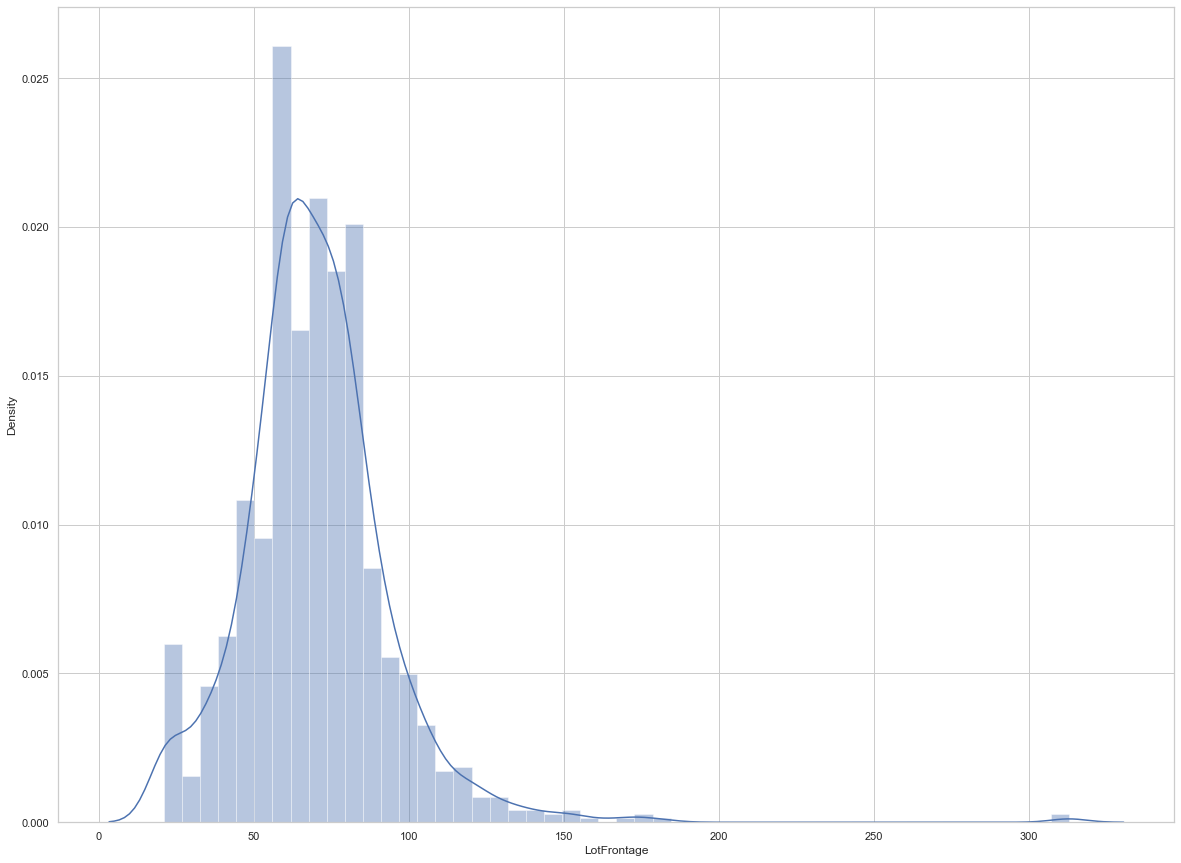

In [22]:
# Distribution plot for LotFrontage
sns.distplot(df.LotFrontage)

In [23]:
# Getting the mean for LotFrontage
df.LotFrontage.mean()

70.04995836802665

In [24]:
# Checking the percentage of missing values for LotFrontage
print('The Percentage of data missing in LotFrontage is: ',df.LotFrontage.isnull().sum()/len(df)*100)

The Percentage of data missing in LotFrontage is:  17.73972602739726


In [25]:
# Displaying all values of LotFrontage with Null values
df.loc[df['LotFrontage'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,5.301030
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,144000,5.158362
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,5.195900
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,5.173186
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,5.187521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2007,WD,Normal,182900,5.262214
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,143750,5.157608
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,149300,5.174060
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,WD,Normal,121000,5.082785


In [26]:
# Replacing the Null values with mean in LotFrontage
df.loc[df['LotFrontage'].isnull()==True,'LotFrontage']=70.0

In [27]:
# Handling the missing values for Alley,PoolQC,Fence,MiscFeature

In [28]:
# Checking the percentage of missing values in Alley,PoolQC,Fence,MiscFeature
d1=df[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
a

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [29]:
# We observe that more than 80% of the data are missing in Alley,PoolQC,Fence,MiscFeature

In [30]:
# Dropping these features
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [31]:
# Handling the missing values for BsmtQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

In [32]:
# Checking the percentage of missing values
d2=df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
b=d2.isnull().sum()/len(d2)*100
b

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64

In [33]:
# Replacing the missing values with 'NA'
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')

In [34]:
# Replacing missing values for MasVnrType

In [35]:
# Checking the value count of MasVnrType
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
# Replacing the missing values with mode
df.loc[df['MasVnrType'].isnull()==True,'MasVnrType'] = 'None'

In [37]:
# Replacing missing values for MasVnrArea

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

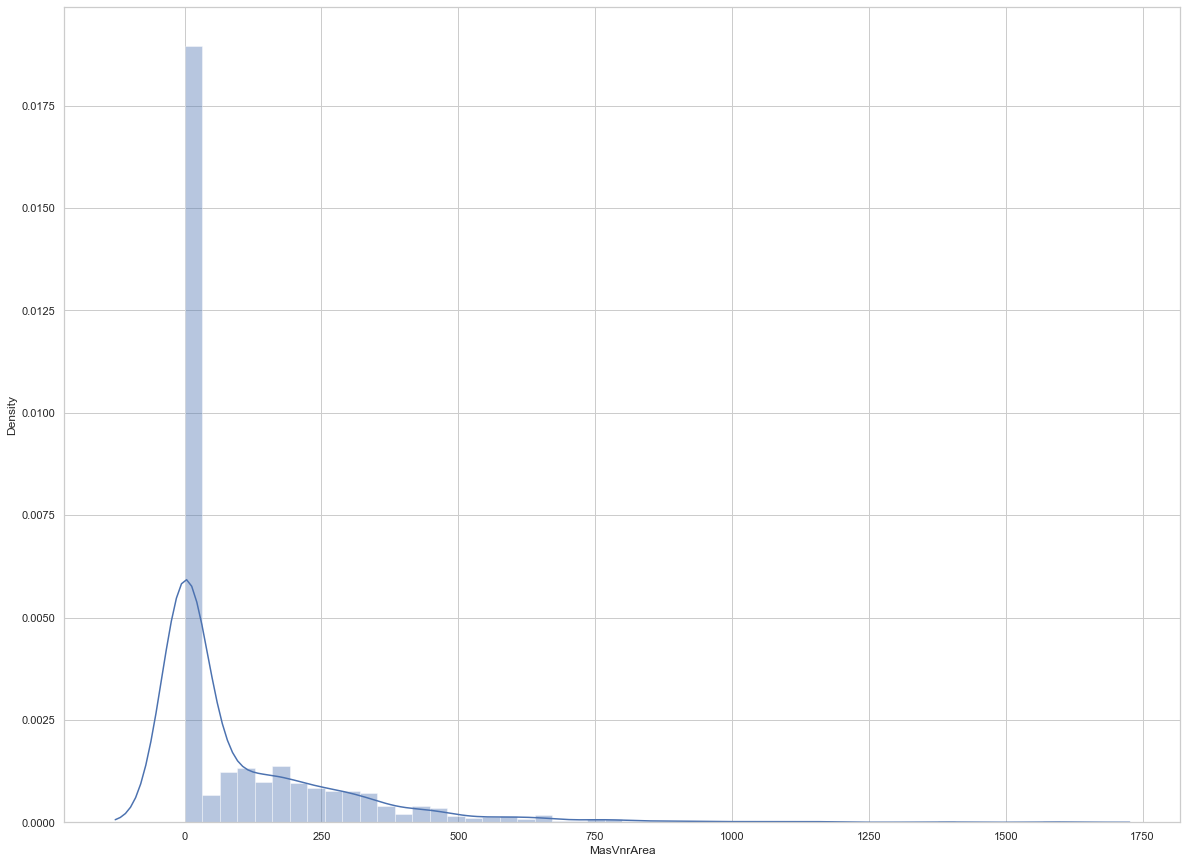

In [38]:
# Plotting a distribution graph for MasVnrArea
sns.distplot(df.MasVnrArea)

In [39]:
# Finding the median
df['MasVnrArea'].median()

0.0

In [40]:
# Replacing the missing value by median
df.loc[df['MasVnrArea'].isnull()== True,'MasVnrArea'] = 0.0

In [41]:
# Handling missing values for GarageType,GarageFinish,GarageQual,GarageCond

In [42]:
# Checking the percentage of missing values
d3=df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
c=d3.isnull().sum()/len(d3)*100
c

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [43]:
# Replacing the missing values for GarageType,GarageFinish,GarageQual,GarageCond with NA
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageCond']=df['GarageCond'].fillna('NA')

In [44]:
# Handling the missing value for GarageYrBlt

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

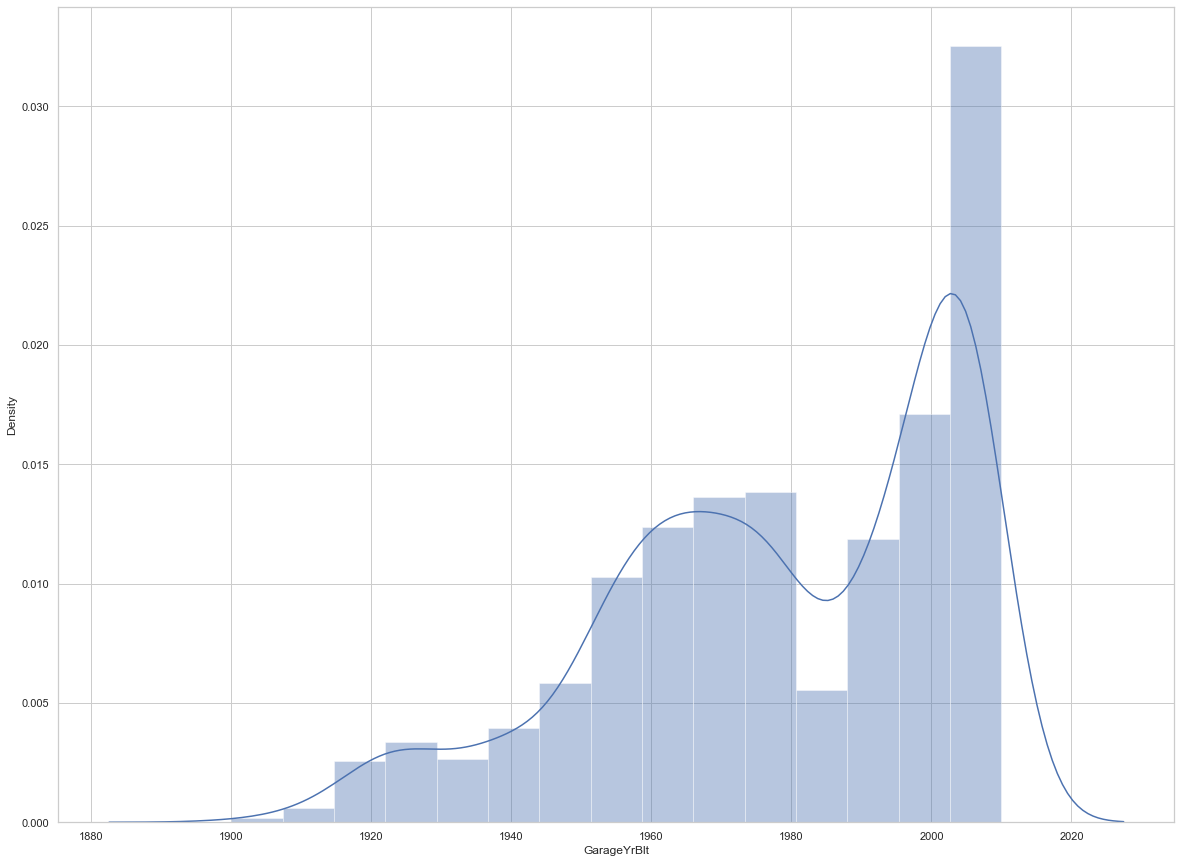

In [45]:
# Plotting the distribution graph for GarageYrBit
sns.distplot(df.GarageYrBlt)

In [46]:
# Checking the median for GarageYrBit
df.GarageYrBlt.median()

1980.0

In [47]:
# Replacing the null values with the median
df.loc[df['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1980.0

In [48]:
# Handling the missing value for Electrical

In [49]:
# Checking the value count for Electrical
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [50]:
# Replacing the null values with mode
df.loc[df['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [51]:
# Handling the missing values for FireplaceQu

In [52]:
# Checking the value count for FireplaceQu
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [53]:
# Replacing the missing values with NA
df.loc[df['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [54]:
# Checking for null values in any column for the last time
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
LogSalePrice     0
Length: 78, dtype: int64

In [55]:
# We observe that there are no null values left in the dataframe

In [56]:
# We move on to check which features correlates with the SalePrice the most

In [57]:
# Creating a list of column names for categorical and numerical features
cate_feat = list(df.select_dtypes(include = [object]).columns)
num_feat = list(df.select_dtypes(include = [int,float]).columns)

print(cate_feat)
print("\n")
print(num_feat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch

Text(0.5, 1.0, 'SalePrice Correlation')

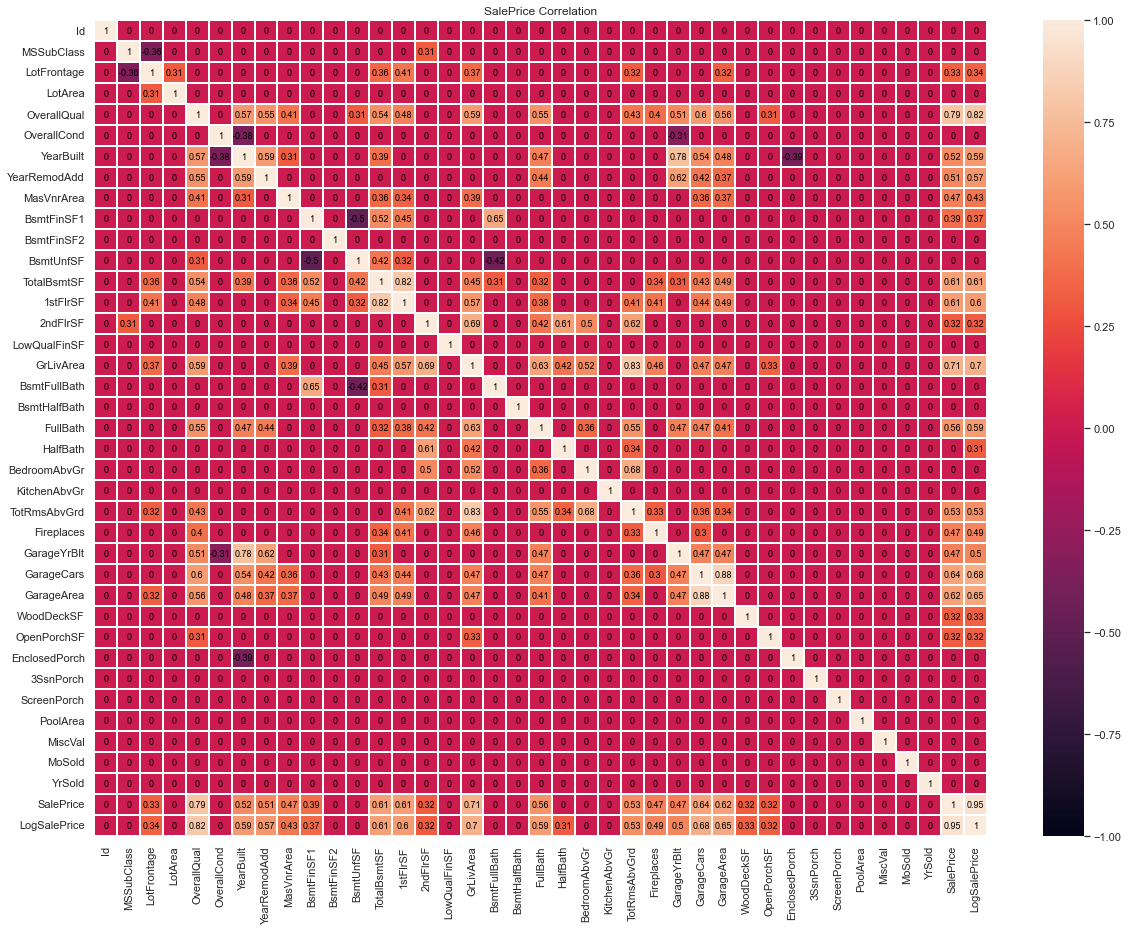

In [58]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Defining the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format # Round off to two decimal places

# Defining the correlation matrix
corr_matrix = df[num_feat].corr()

# Replacing correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Plotting the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1, annot_kws={"size": 9, "color": "black"},annot=True)
plt.title("SalePrice Correlation")

In [59]:
# We observe that the overall quality of the house and Ground living Area has 0.79 and 0.74 correlation with the SalePrice
# We observe that Garagecars has 0.64 correlation with SalePrice

In [60]:
# Visualizing indivisually
corr = df.corr()["SalePrice"].sort_values(ascending = False)[2:8] # We start from 2 to ignore SalePrice, LogSalePrice
corr

OverallQual   0.79
GrLivArea     0.71
GarageCars    0.64
GarageArea    0.62
TotalBsmtSF   0.61
1stFlrSF      0.61
Name: SalePrice, dtype: float64

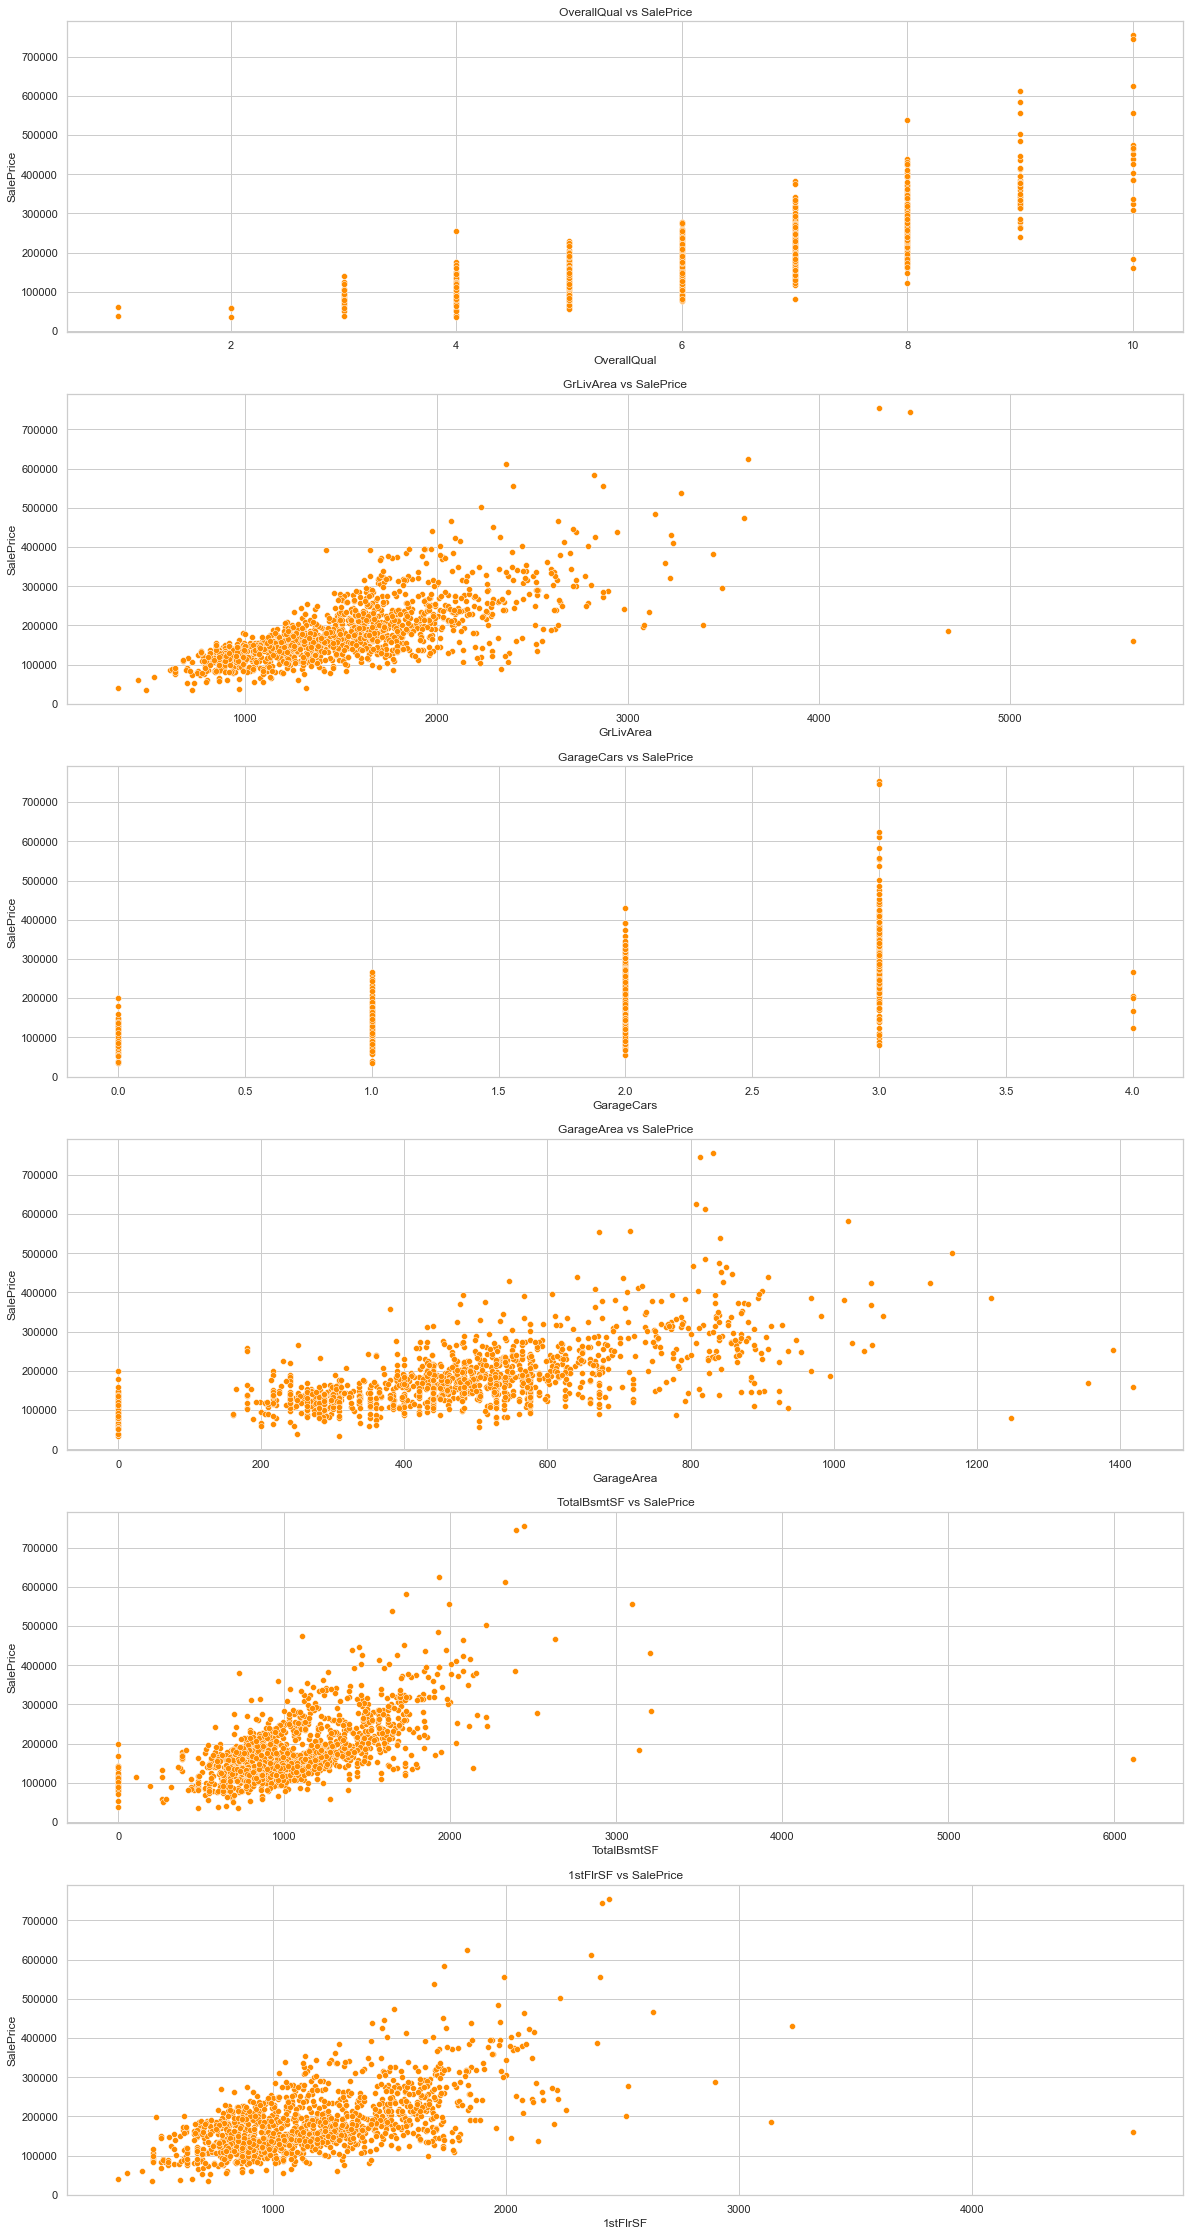

In [61]:
# Plotting subplots and scatterplots to check for the correlation
f,ax = plt.subplots(nrows = 6,ncols = 1, figsize = (20,40))
for i,col in enumerate(corr.index):    
    sns.scatterplot(x = col, y = "SalePrice", data = df, ax = ax[i], color = 'darkorange')
    ax[i].set_title(f'{col} vs SalePrice')

In [62]:
# We see that the features are linear with the SalePrice thus suggesting positive correlation 

In [63]:
# Checking Which year most of the houses were built (Top 10), and does the year built say anything regarding the sale price?

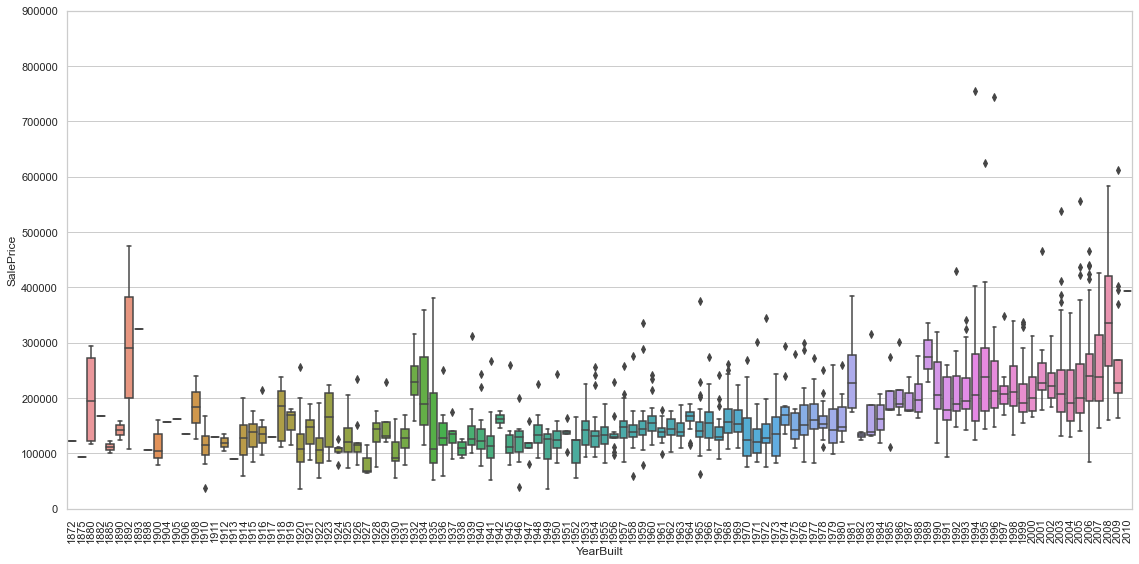

In [64]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df,)
fig.axis(ymin=0, ymax=900000);
plt.xticks(rotation=90); # To rotate the axis text
plt.tight_layout() # Adjusts the padding between and around subplots

Text(0.5, 1.0, 'Year Built')

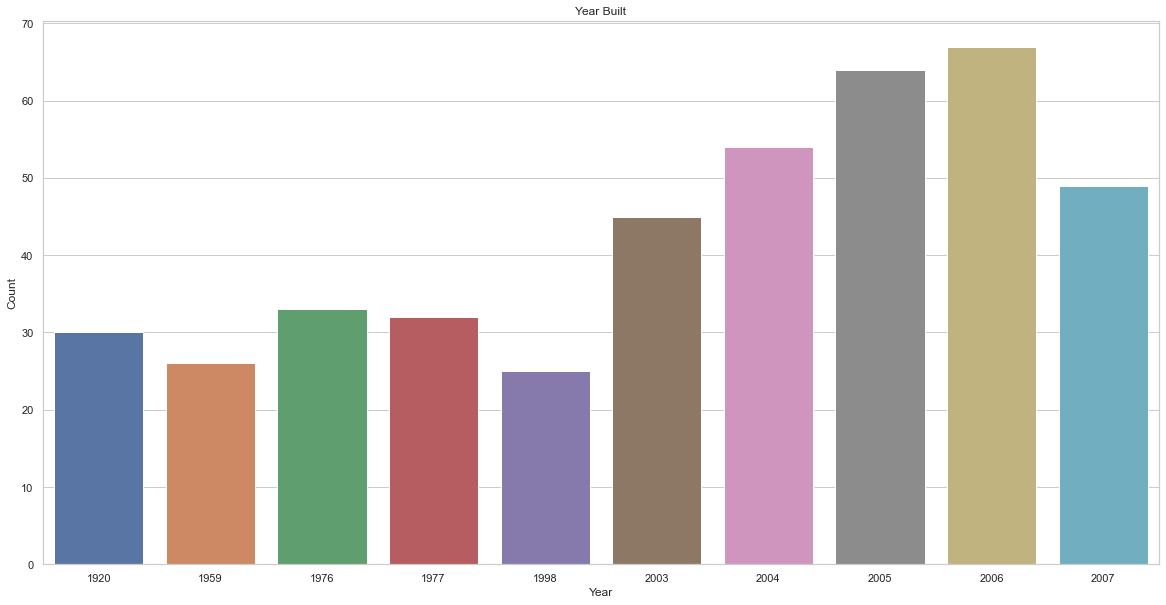

In [65]:
# Creating a new dataframe and then graph a barplot to plot number of houses built in each year
yr_built = pd.DataFrame({"Count":df["YearBuilt"].value_counts()[:10]}).reset_index()
yr_built.rename(columns={'index':'Year'},inplace=True)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Year', y = "Count", data = yr_built)
plt.title("Year Built")

<AxesSubplot:xlabel='MoSold'>

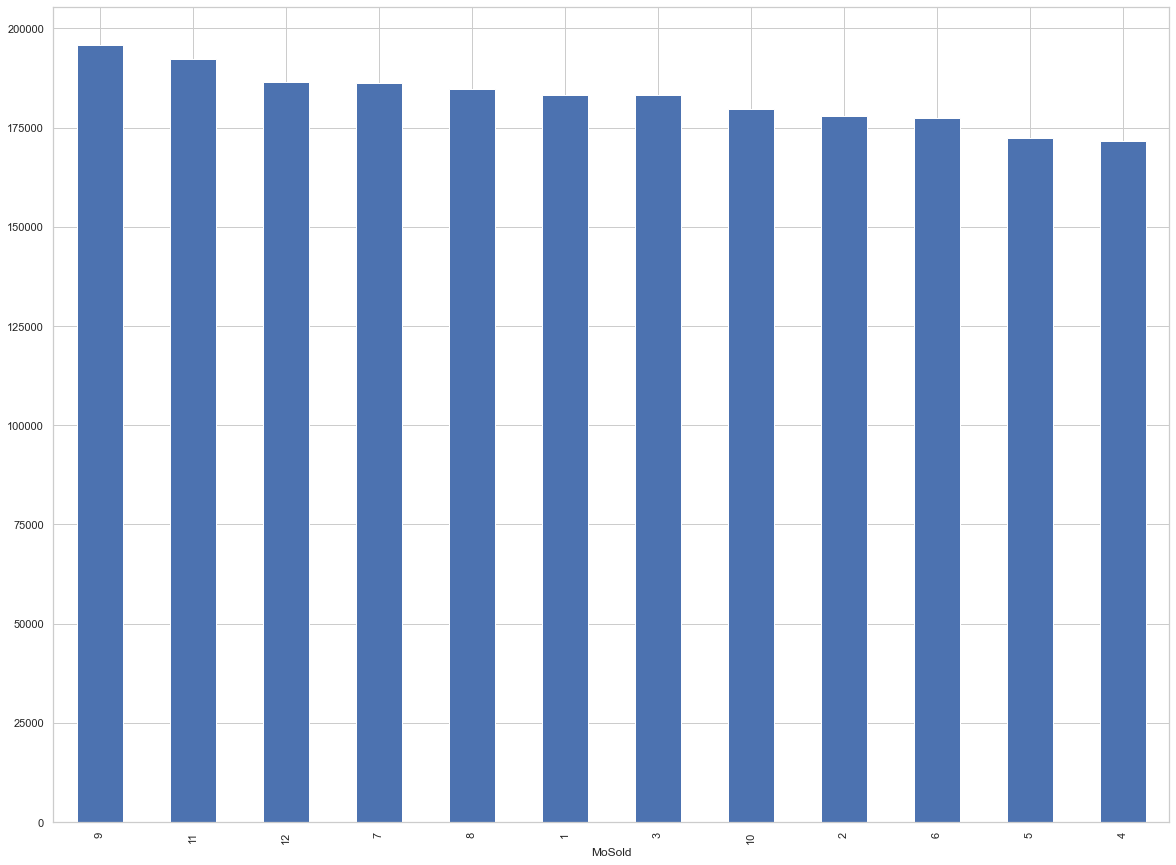

In [66]:
# Checking if there is a huge difference in sale price based on different months
df.groupby("MoSold").mean()["SalePrice"].sort_values(ascending = False).plot(kind = 'bar')

In [67]:
# Exploratory Data Analysis

In [68]:
# Univarient Analysis

In [69]:
# Getting the features with object datatype
dtype_objects = list(columns for columns in df.select_dtypes([object]).columns)

In [70]:
# Displaying the list with features with object datatype
dtype_objects

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [71]:
# Checking the number of features with object datatype
len(dtype_objects)

39

In [72]:
# Plotting a countplot for datatype with objects

In [73]:
# Countplot shows the counts of observations in each categorical bin using bars

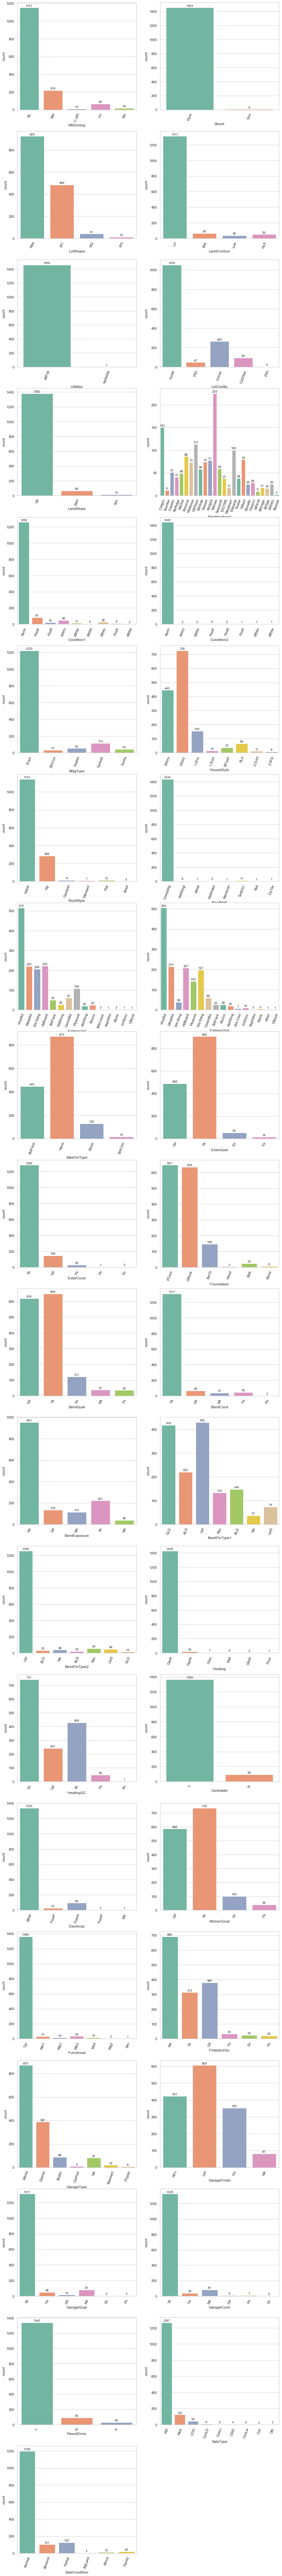

In [74]:
plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber) # With the subplot() function you can draw multiple plots in one figure
    b= sns.countplot(x=df[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()), # Annotations means displaying the value on top of bar
            (bar.get_x() + bar.get_width() / 2, # For x axis coordinates
            bar.get_height()), ha='center', va='center', # For y axis coordinates, ha = horizontal alignment, va =vertical align
            size=10, xytext=(0, 6),textcoords='offset points') # xytext = number of pixels left from edge of graph
plt.show()

In [75]:
# Count plots for the datatype object has been plotted

In [76]:
# Getting the features with float datatype
dtype_float =list(columns for columns in df.select_dtypes([float]).columns)

In [77]:
# Displaying the list of features with float datatypes 
dtype_float

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LogSalePrice']

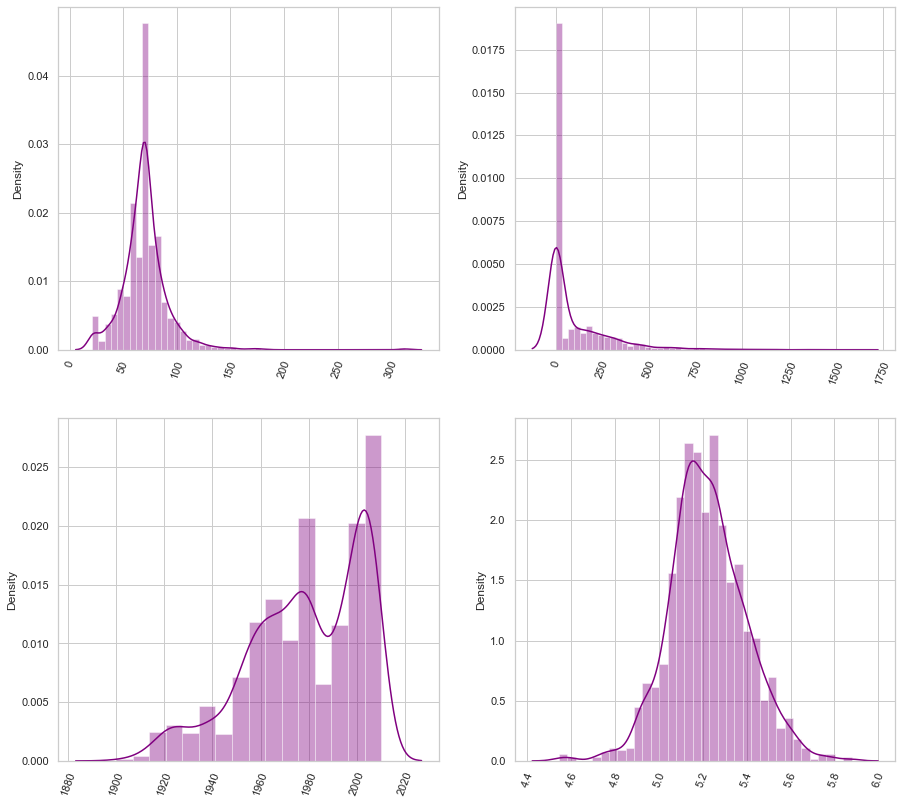

In [78]:
# Distribution plot 
plt.figure(figsize=(15,150))
plotnumber=1
for a in dtype_float:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=df[a],color='purple')
    plt.xticks(rotation=70)
    plotnumber+=1
plt.show()

In [79]:
# We observe From the graph that LotFrontage gives normal distribution but MasVnrArea and GarageYrBlt is skewed

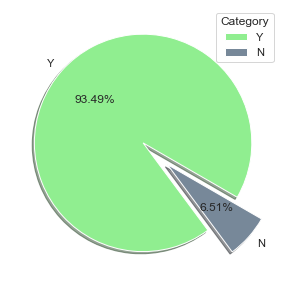

In [80]:
# Pie plot for CentralAir
plt.figure(figsize=(5,5))
labels=['Y','N']
size=df['CentralAir'].value_counts()
colors=['lightgreen','lightslategray']
explode=[0,0.3] # To make an edge stand out
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') # used to label at the side
plt.show()

In [81]:
# We observe from the graph that 93.49% houses has CentralAir and 6.51% houses has no CentralAir

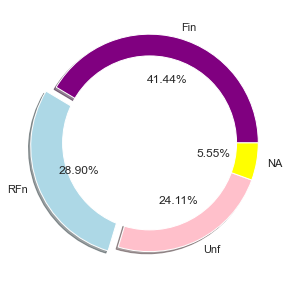

In [82]:
# Donut chart for GarageFinish
plt.figure(figsize=(5,5))
labels=['Fin','RFn','Unf','NA']
size=df['GarageFinish'].value_counts()
colors=['purple','lightblue','pink','yellow']
explode=[0,0.1,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
circle = plt.Circle( (0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [83]:
# We observe from the graph that for 41.44% of the houses the interior of the garage is finished

In [84]:
# Bivarient and Multivarient Analysis

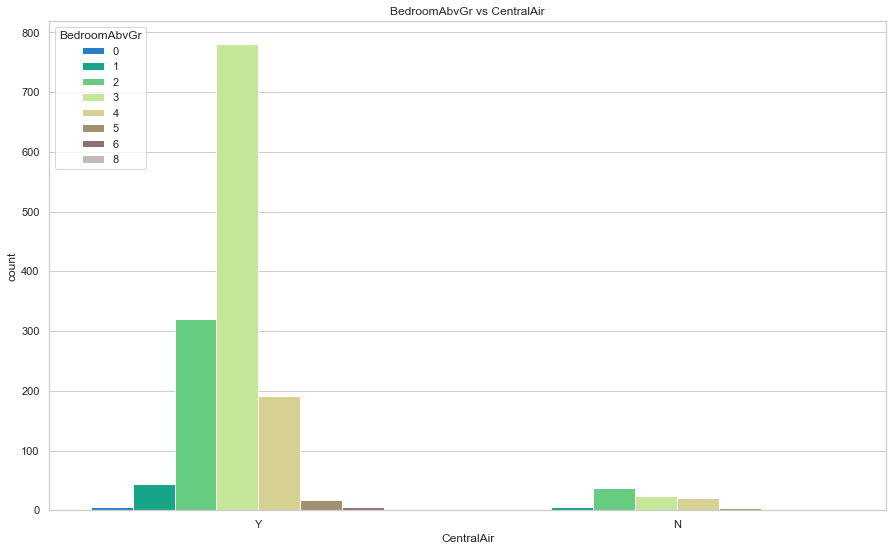

In [85]:
# Countplot for CentralAir and BedroomAbvGr
plt.figure(figsize=(15,9))
sns.countplot(x='CentralAir',hue='BedroomAbvGr',palette='terrain',data=df).set(title="BedroomAbvGr vs CentralAir")
plt.show()

In [86]:
# We observe that the houses with 3 bedrooms has more central air conditioning than others

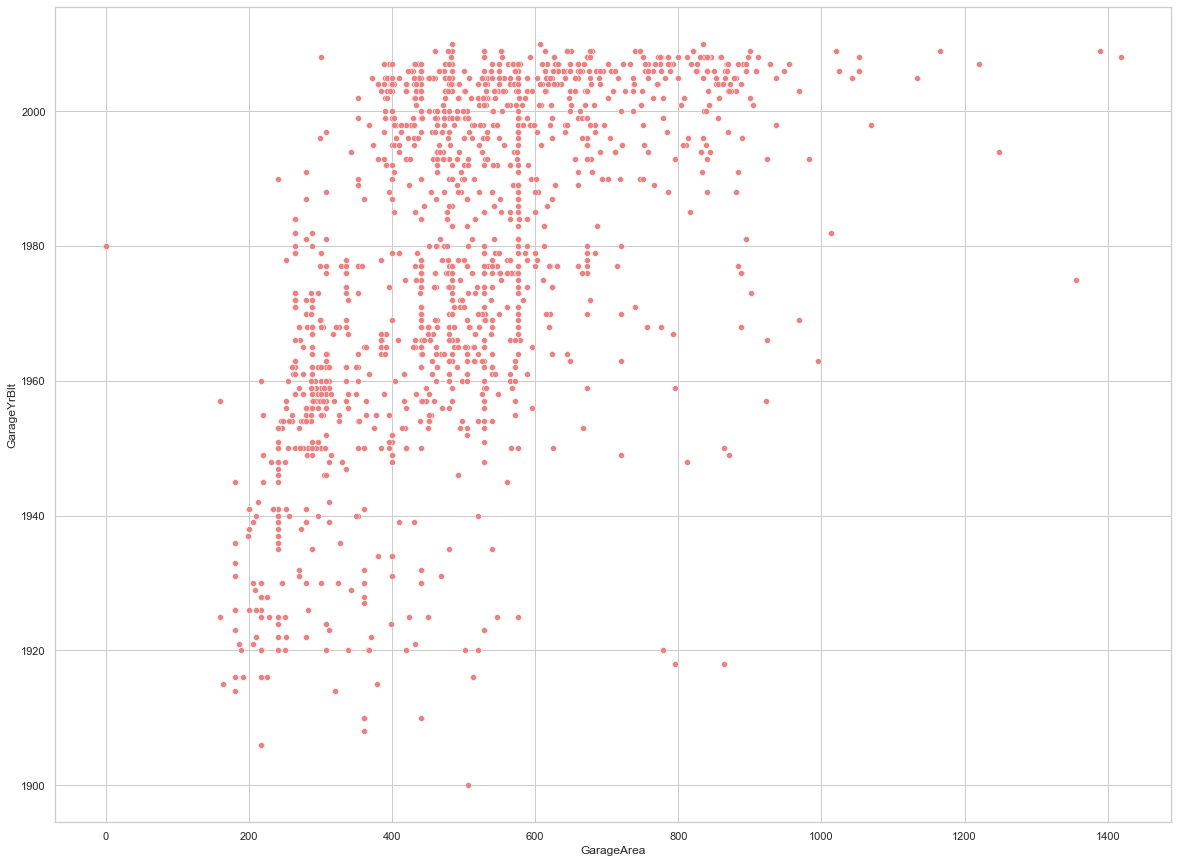

In [87]:
# Scatter plot for GarageArea and GarageYrBlt
sns.scatterplot(x='GarageArea',y='GarageYrBlt',data=df,color='lightcoral')
plt.show()

In [88]:
# We observe that there are some outliers present while comparing garage area and garage year built

In [89]:
data=df

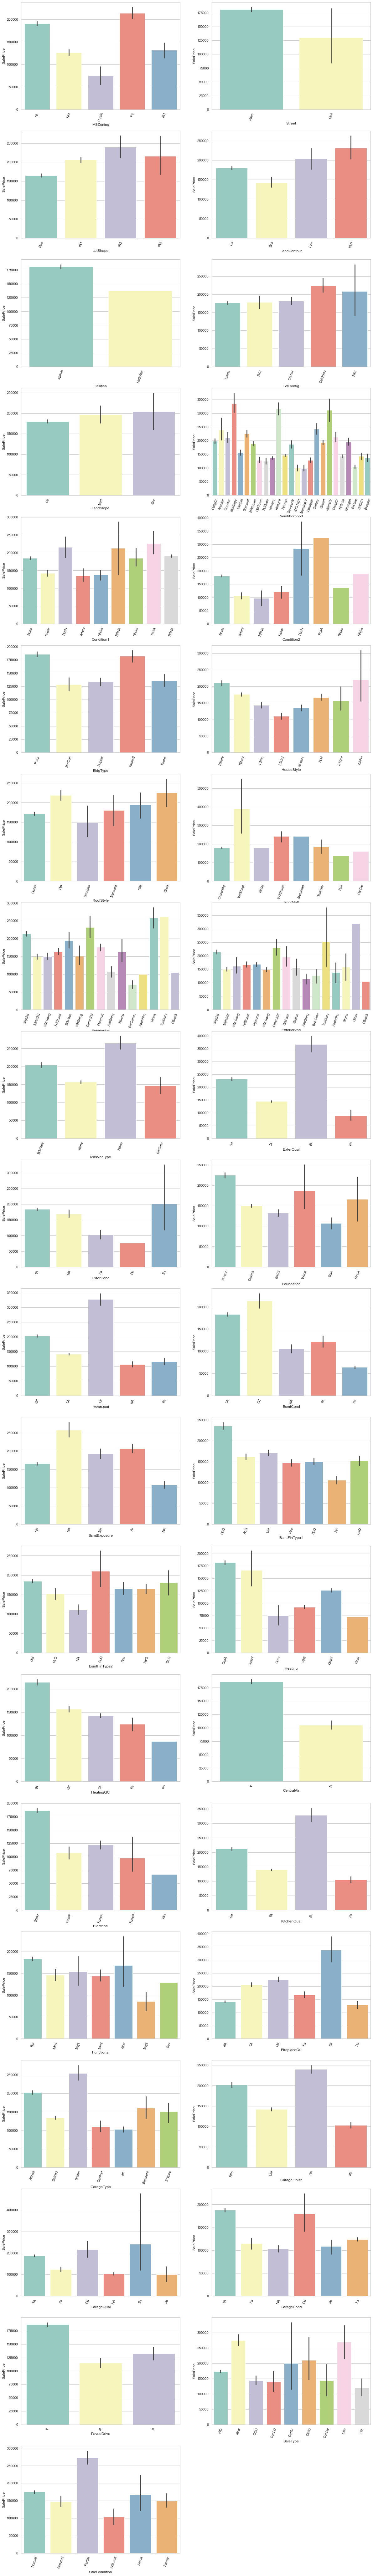

In [90]:
# Barplot for saleprice and the data type with objects
plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=data[c],y=data.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show() 

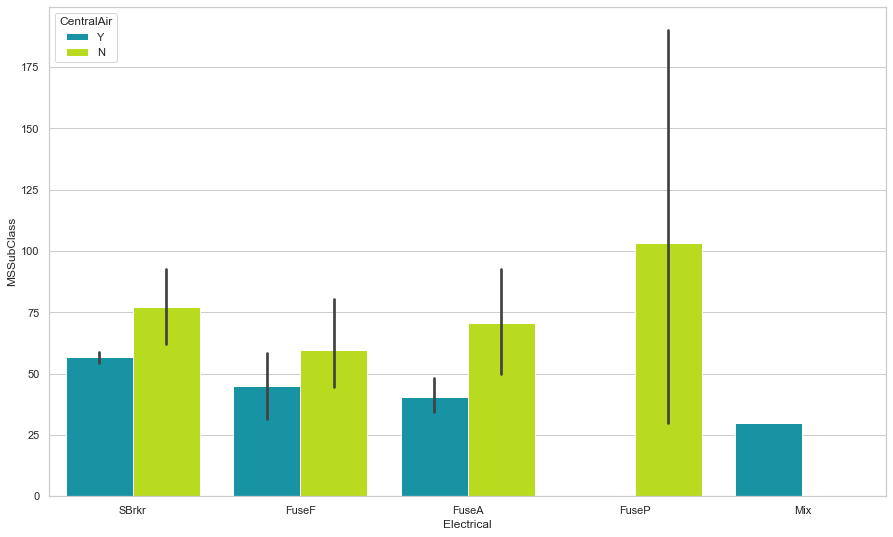

In [91]:
# Bar plot for Electrical, MSSubClass, CentralAir
plt.figure(figsize=(15,9))
splot=sns.barplot(x='Electrical',y='MSSubClass',hue='CentralAir',palette='nipy_spectral',data=data)
plt.show()

In [92]:
# We see buildings with 2-STORY 1946 & NEWER and Standard Circuit Breakers & Romex use more central air conditioning than others

In [93]:
# Getting the continuous data features
box=df[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

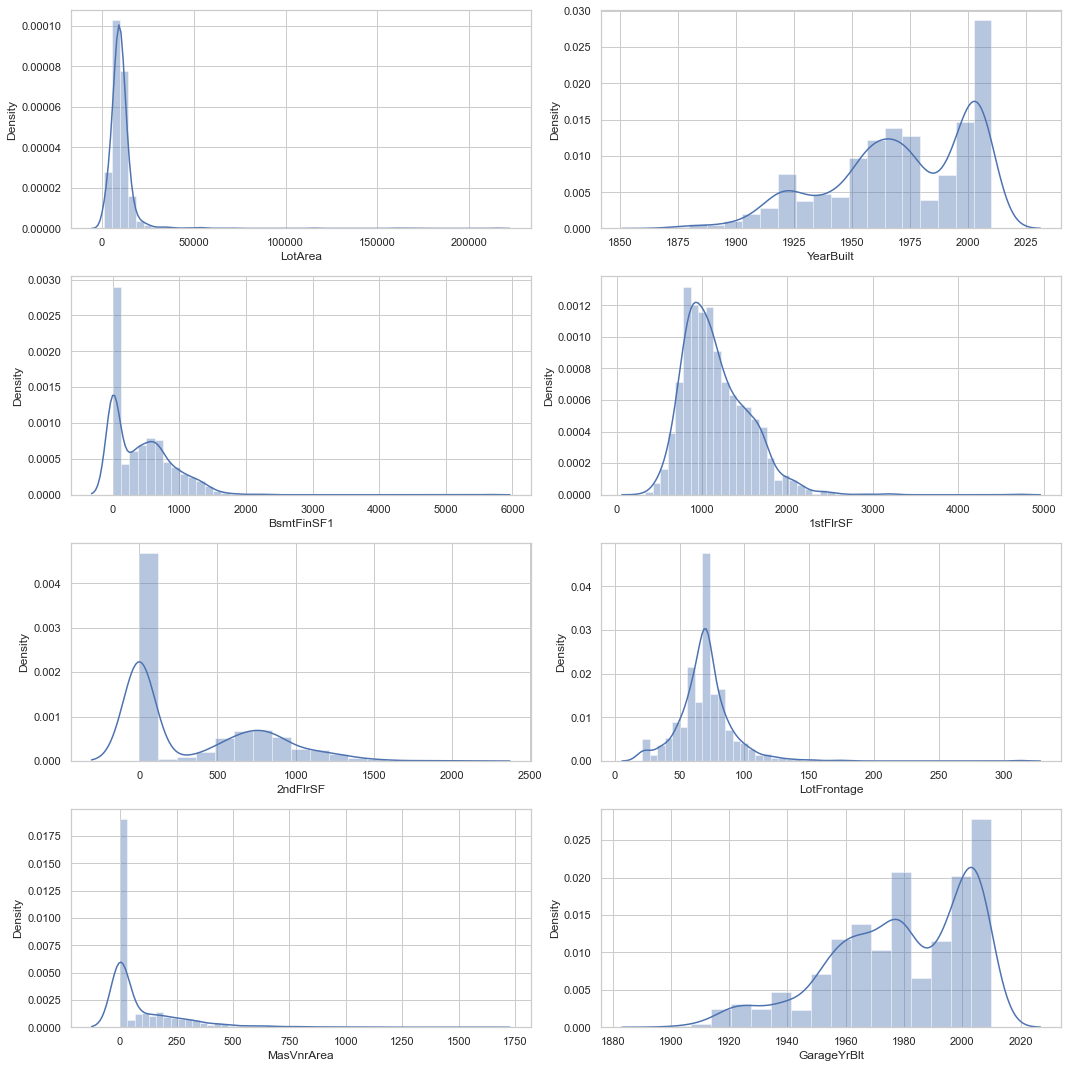

In [94]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for c in box:
    if(plotnum<9):
        a = plt.subplot(4,2,plotnum) #plotting 8 graphs
        sns.distplot(box[c]) #to know distribution
    plotnum+= 1 #increment counter
plt.tight_layout() # For adjusting the padding between and around subplots

In [95]:
# Finding the outliers

In [96]:
# Getting the continuous data features
box=df[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

In [97]:
# Displaying the continuous data features 
box

,LotArea,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,LotFrontage,MasVnrArea,GarageYrBlt
0,8450,2003,706,856,854,65.00,196.00,"2,003.00"
1,9600,1976,978,1262,0,80.00,0.00,"1,976.00"
2,11250,2001,486,920,866,68.00,162.00,"2,001.00"
3,9550,1915,216,961,756,60.00,0.00,"1,998.00"
4,14260,2000,655,1145,1053,84.00,350.00,"2,000.00"
...,...,...,...,...,...,...,...,...
1455,7917,1999,0,953,694,62.00,0.00,"1,999.00"
1456,13175,1978,790,2073,0,85.00,119.00,"1,978.00"
1457,9042,1941,275,1188,1152,66.00,0.00,"1,941.00"
1458,9717,1950,49,1078,0,68.00,0.00,"1,950.00"


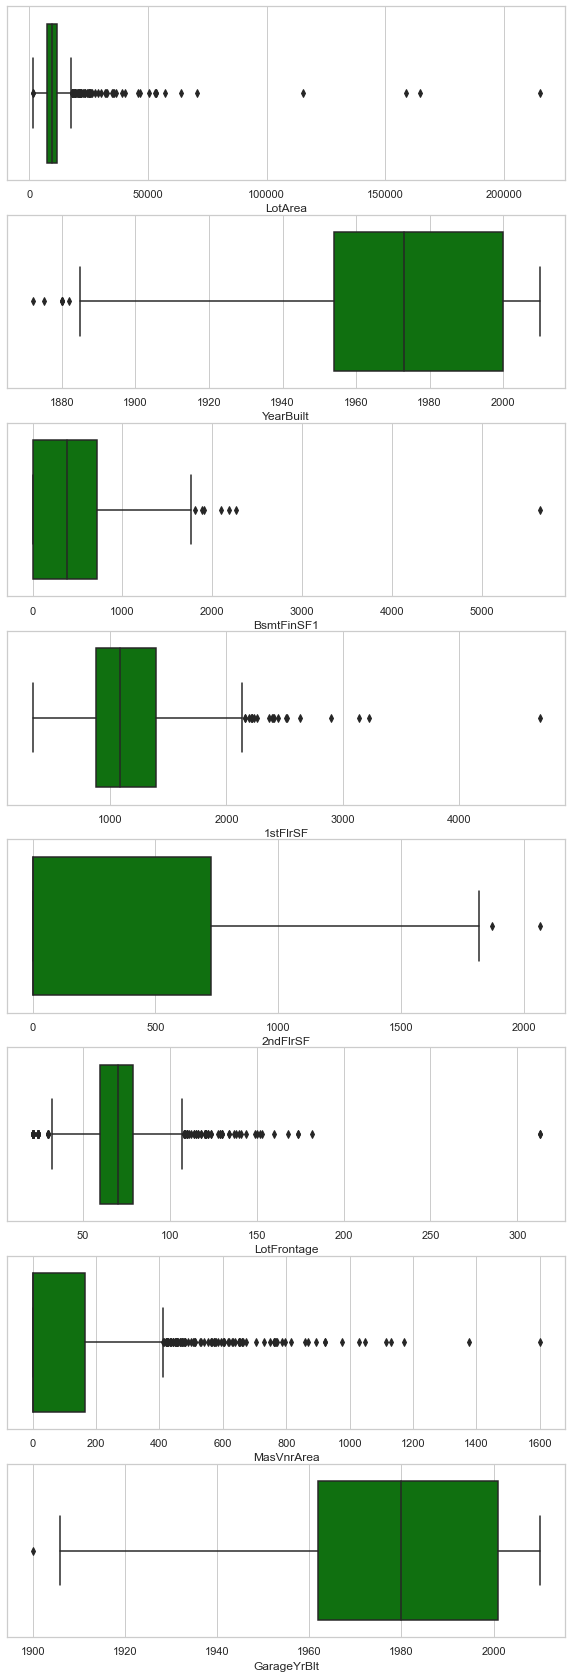

In [98]:
# Boxplot to find the outliers
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(data[c],color='green')
    plotnumber=plotnumber + 1 
plt.show()

In [99]:
# Handling the skewness

In [100]:
from scipy.stats import skew
numerical_features = data.dtypes[data.dtypes != 'object'].index

# Checking the skewness in all the numerical features
skewed_features = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# Converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_features})

# Checking the head of skewness dataset
skewness

,skew
MiscVal,24.45
PoolArea,14.81
LotArea,12.20
3SsnPorch,10.29
LowQualFinSF,9.00
KitchenAbvGr,4.48
BsmtFinSF2,4.25
ScreenPorch,4.12
BsmtHalfBath,4.10
EnclosedPorch,3.09


In [101]:
# Applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# Printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# Importing box-cox1p
from scipy.special import boxcox1p

# Defining the skewed features
skewed_features = skewness.index

lamda = 0.15
for features in skewed_features:
    df[features] += 1
    df[features] = boxcox1p(df[features], lamda)
df[skewed_features] = np.log1p(df[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')

There are 39 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


In [102]:
# Changing categorical data to numerical data

In [103]:
# Getting all the categorical feature
data_object = df.select_dtypes(include = "object").columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [104]:
# Label Encoding to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    df[features] = le.fit_transform(df[features].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [105]:
# Feature Scaling

In [106]:
# Feature scaling is a method used to normalize the range of independent variables or features of data

In [107]:
# Scaling the features
# Spliting the variables

x=df.drop(['Id','SalePrice'],axis=1) # All the features
y=df['SalePrice']  # Target variable

In [108]:
# Using minmax scaler to scale all the datas
from sklearn.preprocessing import MinMaxScaler # Used to transform features by scaling each feature to a given range
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

In [109]:
# Performing the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=0)

print("Traning Shape = ",x_train.shape)  # number of rows and columns  given for training
print('Testing Shape = ',x_test.shape)  # number of row and columns given for testing

Traning Shape =  (1168, 76)
Testing Shape =  (292, 76)


In [110]:
# Model Evaluation

In [111]:
# Linear Regression

In [112]:
# Importing the library

from sklearn.linear_model import LinearRegression

In [113]:
LR=LinearRegression()
LR.fit(x_train,y_train)  # Fitting the training data

x_test_pred_LR=LR.predict(x_test)  # Predicting x test

In [114]:
# Displaying the predicted x_test using LR
x_test_pred_LR

array([3.58225096, 3.51073145, 3.47679707, 3.57476195, 3.43600779,
       3.43058714, 3.64094753, 3.5206022 , 3.79807657, 3.5305856 ,
       3.58903708, 3.5133536 , 3.60258812, 3.49633842, 3.49144597,
       3.52558075, 3.57358263, 3.49816668, 3.53052435, 3.53754812,
       3.55020587, 3.52578819, 3.47791423, 3.55743616, 3.56887349,
       3.55205181, 3.56134753, 3.42981331, 3.66393621, 3.49095835,
       3.47625511, 3.59310777, 3.53806694, 3.62039416, 3.68710741,
       3.55840556, 3.63922834, 3.48062436, 3.62837988, 3.66478797,
       3.61418271, 3.50589042, 3.54898038, 3.63996597, 3.69948546,
       3.48975852, 3.4984038 , 3.50357549, 3.55653948, 3.43066761,
       3.70460304, 3.53847227, 3.55165969, 3.46097382, 3.63578788,
       3.49694587, 3.51018815, 3.6128836 , 3.51817865, 3.48449789,
       3.51651608, 3.5130942 , 3.51238947, 3.56367854, 3.576521  ,
       3.5396283 , 3.50907391, 3.60121882, 3.51841819, 3.60235501,
       3.57183799, 3.48859701, 3.4261631 , 3.69480319, 3.48052

In [115]:
# Displaying the y_test
y_test # Tested y

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [116]:
x_train_pred_LR=LR.predict(x_train) #Predicted x_train

x_train_pred_LR

array([3.66059537, 3.47663109, 3.54662469, ..., 3.47932418, 3.60831821,
       3.59878531])

In [117]:
y_train  # Trained y

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [118]:
print('Linear Regression trainind score is',LR.score(x_train,y_train))

Linear Regression trainind score is 0.9998270692514184


In [119]:
print('Linear Regression testing score is',LR.score(x_test,y_test))

Linear Regression testing score is 0.9997997133114862


In [120]:
# Evaluation Metrics for Linear Regression

In [121]:
# Evaluation metrics are used to check the quality of the statistical model

In [122]:
from sklearn.metrics import r2_score
train_score = r2_score(y_train,x_train_pred_LR)
print('Linear Regression r2_score for training is',train_score)

Linear Regression r2_score for training is 0.9998270692514184


In [123]:
test_score=r2_score(y_test,x_test_pred_LR)
print('Linear Regression r2_score for testing is',test_score)

Linear Regression r2_score for testing is 0.9997997133114862


In [124]:
# We observe that the training score is more than testing score so the model is underfitting

In [125]:
# Random Forest Regressor

In [126]:
# Importing the library

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train,y_train) # Fitting the data

x_test_pred_RF = RF.predict(x_test)  #Predicted x_test

In [127]:
# Displaying the predicted x_test
x_test_pred_RF

array([3.58219965, 3.51041719, 3.47702947, 3.57474897, 3.43755269,
       3.43148686, 3.64231357, 3.52095152, 3.77582264, 3.53016512,
       3.58912331, 3.51543237, 3.60186545, 3.49676283, 3.49077797,
       3.52552824, 3.57270142, 3.49769037, 3.53062895, 3.53718919,
       3.54892154, 3.52499955, 3.47698326, 3.5573086 , 3.56799847,
       3.55120934, 3.56107142, 3.43103057, 3.66210733, 3.49011909,
       3.47699773, 3.59247539, 3.5383949 , 3.62019784, 3.68958804,
       3.55827954, 3.63861015, 3.48099112, 3.628973  , 3.66606893,
       3.61615707, 3.50630879, 3.54805317, 3.63977364, 3.70182949,
       3.49079738, 3.49943431, 3.50367895, 3.55588266, 3.43128177,
       3.70512789, 3.53842842, 3.55122636, 3.45998796, 3.63650086,
       3.49667178, 3.50893258, 3.61310459, 3.51808143, 3.48475211,
       3.5162738 , 3.51299971, 3.51247429, 3.56397826, 3.57624464,
       3.53945888, 3.50897603, 3.60191006, 3.51804188, 3.60191924,
       3.57169742, 3.48926841, 3.42574235, 3.69881034, 3.48023

In [128]:
y_test   # y test

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [129]:
x_train_pred_RF = LR.predict(x_train)  # Predicted x_train
x_train_pred_RF 

array([3.66059537, 3.47663109, 3.54662469, ..., 3.47932418, 3.60831821,
       3.59878531])

In [130]:
y_train  # y train

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [131]:
# Random Foresr Regressor Score

In [132]:
print('Training score for Random Forest Regressor is',RF.score(x_train,y_train))

Training score for Random Forest Regressor is 0.9998796104821762


In [133]:
print('Testing score for Random Forest Regressor is',RF.score(x_test,y_test))

Testing score for Random Forest Regressor is 0.999108401461514


In [134]:
# Training score is more than Testing score,so the Random Forest Regressor model is underfitting

In [135]:
# To fix the problem of underfitting we will perform hyper parametric tuning

In [136]:
# Hyper parametric Tuning of Random Forest Regressor

In [137]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [100,200,300,400,500,600],  # No. of trees
               'max_features': ['auto', 'sqrt'],  
               'max_depth': [10, 15,20,25], # Maxinum number of levels in trees 
               'min_samples_split':  [2, 5, 10], # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}  #  Method of selecting samples for training each tree

In [138]:
hyper_tuning = RandomizedSearchCV(estimator=RF,param_distributions = random_grid, n_iter = 10, cv= 5, verbose=5, random_state=2)

In [139]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.956 total time=   2.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.898 total time=   2.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.912 total time=   2.1s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.936 total time=   2.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.941 total time=   2.4s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.959 total time=   1.0s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [140]:
hyper_tuning.best_params_  # Getting the best parameters

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [141]:
# Implementing the best parameters
RF_hyper_tuning = RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf= 1,max_features='sqrt',max_depth=30,bootstrap= False) 

In [142]:
RF_hyper_tuning.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=600)

In [143]:
RF_hyper_pred_test = RF_hyper_tuning.predict(x_test) # Predicted hyperparametric tuning x test

RF_hyper_pred_test

array([3.58929248, 3.5165708 , 3.48025812, 3.581485  , 3.44336394,
       3.45801431, 3.62400317, 3.50631551, 3.74382071, 3.53250935,
       3.58945573, 3.52120941, 3.60368549, 3.50140495, 3.49603884,
       3.52482063, 3.5860075 , 3.48028847, 3.52538155, 3.53832153,
       3.52031364, 3.52537356, 3.47222521, 3.55293455, 3.57378689,
       3.566015  , 3.55803986, 3.4255998 , 3.66355306, 3.48848241,
       3.50227116, 3.58657091, 3.52754119, 3.63580654, 3.67411838,
       3.56264371, 3.63740816, 3.48965644, 3.61584608, 3.65897191,
       3.60078312, 3.50854144, 3.55710831, 3.64861965, 3.67599539,
       3.51089255, 3.50216154, 3.50669926, 3.55529668, 3.45494254,
       3.68818193, 3.53149113, 3.5508956 , 3.44002907, 3.62007404,
       3.49062191, 3.50628727, 3.60984855, 3.51727822, 3.47838998,
       3.52154605, 3.51191413, 3.51982635, 3.55073419, 3.58286209,
       3.53749815, 3.5081836 , 3.60219298, 3.51384132, 3.59047527,
       3.56638322, 3.49514381, 3.43434777, 3.61896059, 3.45666

In [144]:
RF_hyper_pred_train=RF_hyper_tuning.predict(x_train)  # Predicted hyper parametric tuning x train

RF_hyper_pred_train

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

In [145]:
# Score after Random Forest Regressor Hyper Parametric Tuning

In [146]:
print('Training score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_train,y_train))

Training score for Random Forest Regressor Hyper Parametric Tuning is  0.9999999999999726


In [147]:
print('Testing score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_test,y_test))

Testing score for Random Forest Regressor Hyper Parametric Tuning is  0.9484058884161197


In [148]:
# Decision Tree Regressor 

In [149]:
# Importing the library

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [150]:
x_test_pred_DT = DT.predict(x_test) # Predicted x test

x_test_pred_DT  # Predicted x test

array([3.58245295, 3.51039005, 3.47700581, 3.57539744, 3.43755724,
       3.42717651, 3.64223346, 3.52124766, 3.80894007, 3.53028646,
       3.58964119, 3.51545753, 3.60193526, 3.49666629, 3.49085334,
       3.52552538, 3.57267414, 3.49666629, 3.53087237, 3.53707514,
       3.54863144, 3.52552538, 3.47700581, 3.55736315, 3.56803594,
       3.55124641, 3.56034098, 3.43140396, 3.66168819, 3.49011267,
       3.47700581, 3.59169864, 3.53831148, 3.62023614, 3.68877845,
       3.55836156, 3.63855422, 3.48096574, 3.63093213, 3.66558726,
       3.61603821, 3.5063872 , 3.54810359, 3.63855422, 3.70186485,
       3.49080012, 3.49950045, 3.50366565, 3.55585445, 3.42824311,
       3.70186485, 3.53831148, 3.55124641, 3.45929932, 3.63668404,
       3.49652334, 3.50906614, 3.61318051, 3.51812521, 3.48483639,
       3.51622398, 3.51300751, 3.51235689, 3.56375046, 3.57494658,
       3.5394277 , 3.50906614, 3.60193526, 3.51812521, 3.60193526,
       3.57175657, 3.48936878, 3.42502337, 3.69777486, 3.48018

In [151]:
y_test # y test

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [152]:
x_train_pred_DT = DT.predict(x_train)  # Predicted x train

x_train_pred_DT

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

In [153]:
y_train # y train

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [154]:
# Checking the score of Decision tree train data
print('Training score for Decision Tree Regressor is',DT.score(x_train,y_train))

Training score for Decision Tree Regressor is 1.0


In [155]:
# Checking the score of Decision tree test data
print('Testing score for Decision Tree Regressor is',DT.score(x_test,y_test))

Testing score for Decision Tree Regressor is 0.9994862480395214


In [156]:
# Training score is more than the Testing score,so the decision tree model is underfitting

In [157]:
# We perform hyper parametric tuning to fix this issue

In [158]:
# Hyper parametric Tuning of Decision Tree

In [159]:
from sklearn.model_selection import RandomizedSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [2,4,6,8],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }

In [160]:
hyper_tuning_DT = RandomizedSearchCV(estimator = DT, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [161]:
hyper_tuning_DT.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [162]:
# Getting the best parameters
hyper_tuning_DT.best_params_

{'splitter': 'random',
 'min_samples_leaf': 4,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 8}

In [163]:
hypertuning_DT = DecisionTreeRegressor(splitter= 'best',min_samples_leaf=4,max_leaf_nodes=15,max_features='sqrt',max_depth=6)

hypertuning_DT

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=4)

In [164]:
hypertuning_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=4)

In [165]:
DT_hyper_pred_xtest = hypertuning_DT.predict(x_test)

DT_hyper_pred_xtest

array([3.57608408, 3.55334963, 3.49256606, 3.58268342, 3.49256606,
       3.49256606, 3.65138203, 3.53804078, 3.69496168, 3.58268342,
       3.58268342, 3.51977865, 3.58268342, 3.49256606, 3.49256606,
       3.49256606, 3.58268342, 3.43944422, 3.49256606, 3.55334963,
       3.51977865, 3.53804078, 3.45674211, 3.56425444, 3.57608408,
       3.58268342, 3.51977865, 3.43944422, 3.69496168, 3.49256606,
       3.51977865, 3.58268342, 3.53804078, 3.58268342, 3.65138203,
       3.58268342, 3.69496168, 3.45674211, 3.65138203, 3.65138203,
       3.57608408, 3.53804078, 3.58268342, 3.65138203, 3.65138203,
       3.49938292, 3.52179585, 3.49256606, 3.57608408, 3.49256606,
       3.69496168, 3.52179585, 3.57608408, 3.43944422, 3.65138203,
       3.52179585, 3.49938292, 3.58268342, 3.52179585, 3.49256606,
       3.52179585, 3.49256606, 3.53804078, 3.53804078, 3.57608408,
       3.53804078, 3.49256606, 3.58268342, 3.51977865, 3.58268342,
       3.58268342, 3.49256606, 3.45674211, 3.65138203, 3.40354

In [166]:
y_test

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [167]:
DT_hyper_pred_xtrain=hypertuning_DT.predict(x_train)

DT_hyper_pred_xtrain

array([3.69496168, 3.49256606, 3.52179585, ..., 3.52398245, 3.58268342,
       3.58268342])

In [168]:
y_train

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [169]:
print('Training score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_train,y_train))

Training score for hyper parametric tuning of Decision tree regressor is 0.809196659506005


In [170]:
print('Testing score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_test,y_test))

Testing score for hyper parametric tuning of Decision tree regressor is 0.7862337186810382


In [171]:
# Xtreme Gradient Boosting

In [172]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train,y_train) 

xtest_XGB_pred=XGB.predict(x_test) # Predicted x test

In [173]:
xtest_XGB_pred

array([3.5804195, 3.5103054, 3.4764278, 3.5748086, 3.4349697, 3.4344463,
       3.643563 , 3.5222733, 3.8059235, 3.5314527, 3.5899923, 3.515817 ,
       3.6016371, 3.49926  , 3.491044 , 3.5255287, 3.5726929, 3.4991171,
       3.5315993, 3.5365124, 3.5473175, 3.5243623, 3.4761117, 3.5577767,
       3.568932 , 3.551433 , 3.5605288, 3.4326615, 3.658815 , 3.4897733,
       3.4766014, 3.591814 , 3.5388033, 3.6194303, 3.6911347, 3.5589206,
       3.6374202, 3.4811525, 3.6310985, 3.668719 , 3.615722 , 3.5071023,
       3.547313 , 3.6381884, 3.7007473, 3.4914076, 3.4996274, 3.5029616,
       3.5561726, 3.4345105, 3.7138174, 3.539015 , 3.5519536, 3.4583936,
       3.635957 , 3.4984612, 3.509807 , 3.6133192, 3.5179055, 3.4842527,
       3.5162833, 3.5121827, 3.5120094, 3.5627384, 3.575459 , 3.5390275,
       3.5093818, 3.6014178, 3.5179567, 3.601737 , 3.5711436, 3.4908044,
       3.4254634, 3.7006123, 3.4809659, 3.6184475, 3.5118768, 3.4192393,
       3.658722 , 3.5413747, 3.5187583, 3.5153887, 

In [174]:
xtrain_XGB_pred=XGB.predict(x_train)

In [175]:
xtrain_XGB_pred

array([3.6601756, 3.4765882, 3.5458307, ..., 3.4809775, 3.6091924,
       3.5997462], dtype=float32)

In [176]:
print('Training score for XGB is',XGB.score(x_train,y_train))

Training score for XGB is 0.9999337232252173


In [177]:
print('Testing score for XGB is',XGB.score(x_test,y_test))

Testing score for XGB is 0.9994552530996582


In [178]:
x_XGB_pred=XGB.predict(x)

In [179]:
# Output

In [190]:
data = pd.read_csv(r'C:\Users\Vidip Jain\OneDrive\Desktop\Data Science\House_Price_Project\train.csv')

In [191]:
my_submission = pd.DataFrame({'Id': data.Id, 'SalePrice': x_XGB_pred})

In [192]:
my_submission

,Id,SalePrice
0,1,3.80
1,2,3.78
2,3,3.80
3,4,3.81
4,5,3.81
...,...,...
1455,1456,3.80
1456,1457,3.78
1457,1458,3.80
1458,1459,3.77


In [193]:
# Saving the prediction
my_submission.to_csv('mysubmission.csv', index=False)